In [1]:
import pandas as pd 
import numpy as np
import scipy.interpolate as sci 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

plt.style.use("classic")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv("TSLA_210121.csv")

# drop low volume and NaN price options
df.where(df.volume >= 25, inplace = True)
df.dropna(subset = ["last"], inplace = True)

# for ease of use 
dfm = df[["strike", "expiration_date", "greeks.smv_vol"]]
dfm.columns = ["strike", "expiration", "IV"]

# convert to datetime to calculate days to expiration
dfm.expiration = pd.to_datetime(dfm.expiration)

# remove deep out-of the money and deep in-the money options
#   Tesla is currently priced around $850
dfm = dfm.loc[dfm.strike.between(600, 1100)]

dfm.reset_index(drop = True)

,strike,expiration,IV
0,600.0,2021-01-22,1.250
1,602.5,2021-01-22,1.250
2,605.0,2021-01-22,1.250
3,607.5,2021-01-22,1.250
4,620.0,2021-01-22,1.250
...,...,...,...
801,700.0,2023-03-17,0.756
802,850.0,2023-03-17,0.762
803,900.0,2023-03-17,0.764
804,1000.0,2023-03-17,0.766


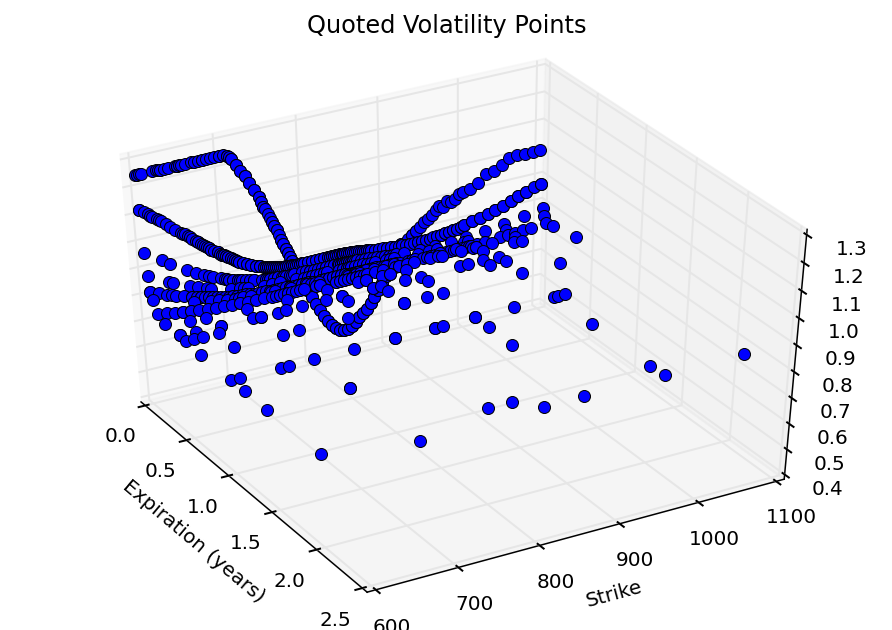

In [8]:
figure = plt.figure()

# set an evaluation date and calculate days to expiration
X = ((dfm.expiration - pd.Timestamp("2021-01-21")).dt.days)/365
Y = dfm.strike.to_list() 
Z = dfm.IV.to_list() 

axs = Axes3D(figure, azim = -30, elev = 40)
axs.plot(X, Y, Z, "o")

plt.title("Quoted Volatility Points",  y = 1.08)
plt.xlabel("Expiration (years)")
plt.ylabel("Strike")
plt.show()

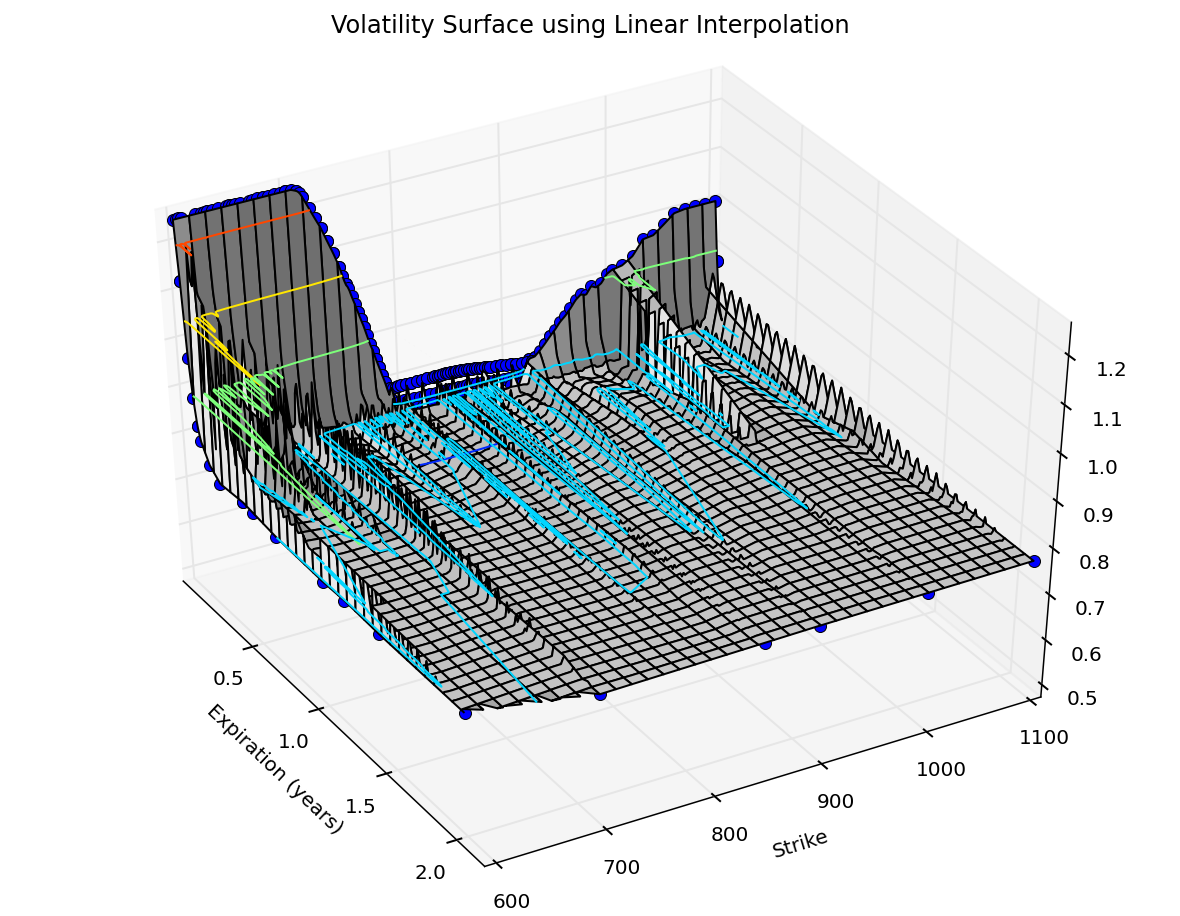

In [9]:
figure = plt.figure(figsize = (8, 6))

XX,YY = np.meshgrid(np.linspace(min(X), max(X), 350), np.linspace(min(Y), max(Y), 350))

ZZ = sci.griddata(np.array([X,Y]).T, np.array(Z),(XX, YY), method = "linear")
axs = Axes3D(figure, azim = -30, elev = 40)
axs.plot_surface(XX,YY,ZZ, color = "white") 
axs.contour(XX, YY, ZZ)
axs.plot(X, Y, Z, "o")

plt.title("Volatility Surface using Linear Interpolation", y = 1.08)
plt.xlabel("Expiration (years)")
plt.ylabel("Strike")
plt.show()

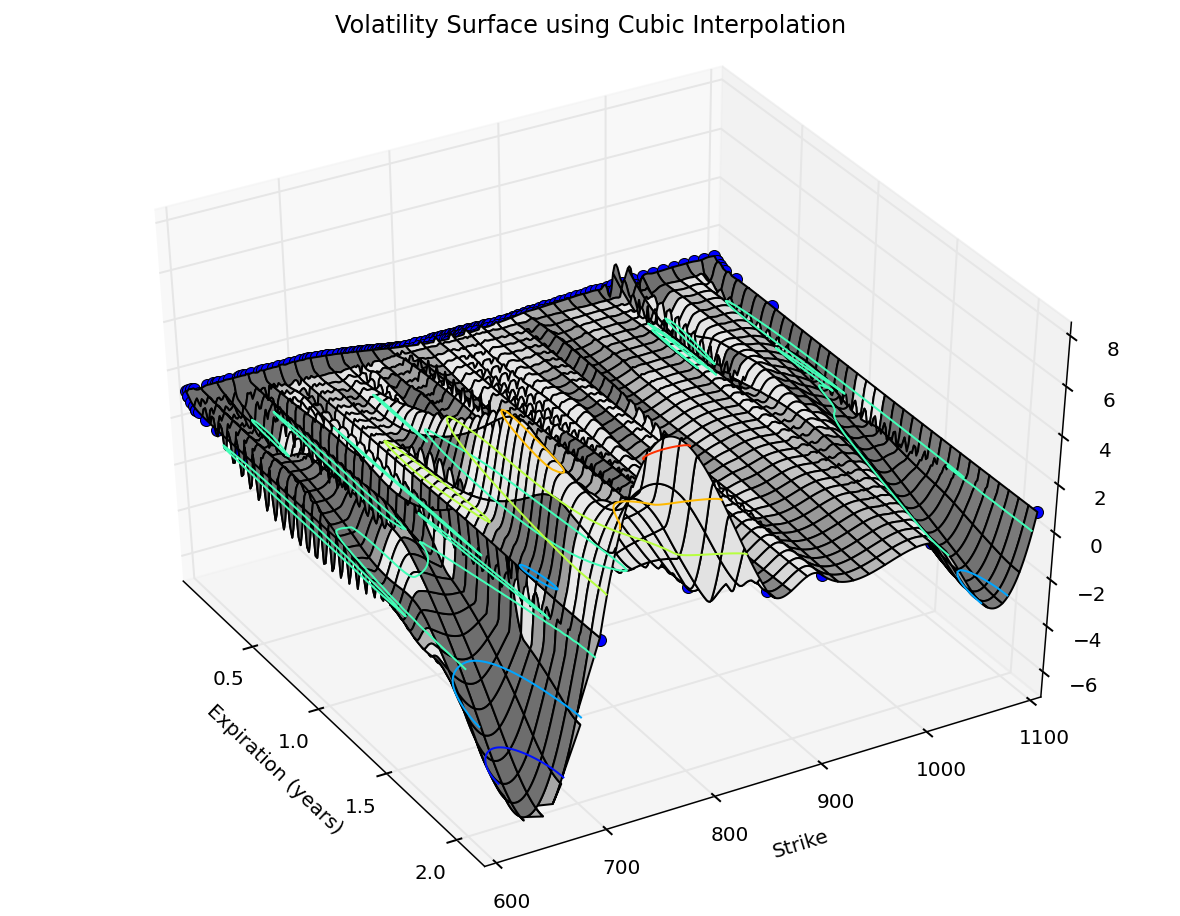

In [10]:
figure = plt.figure(figsize = (8, 6))

XX,YY = np.meshgrid(np.linspace(min(X), max(X), 350), np.linspace(min(Y), max(Y), 350))

ZZ = sci.griddata(np.array([X,Y]).T, np.array(Z),(XX, YY), method = "cubic")
axs = Axes3D(figure, azim = -30, elev = 40)
axs.plot_surface(XX,YY,ZZ, color = "white") 
axs.contour(XX, YY, ZZ)
axs.plot(X, Y, Z, "o")

plt.title("Volatility Surface using Cubic Interpolation", y = 1.08)
plt.xlabel("Expiration (years)")
plt.ylabel("Strike")
plt.show()

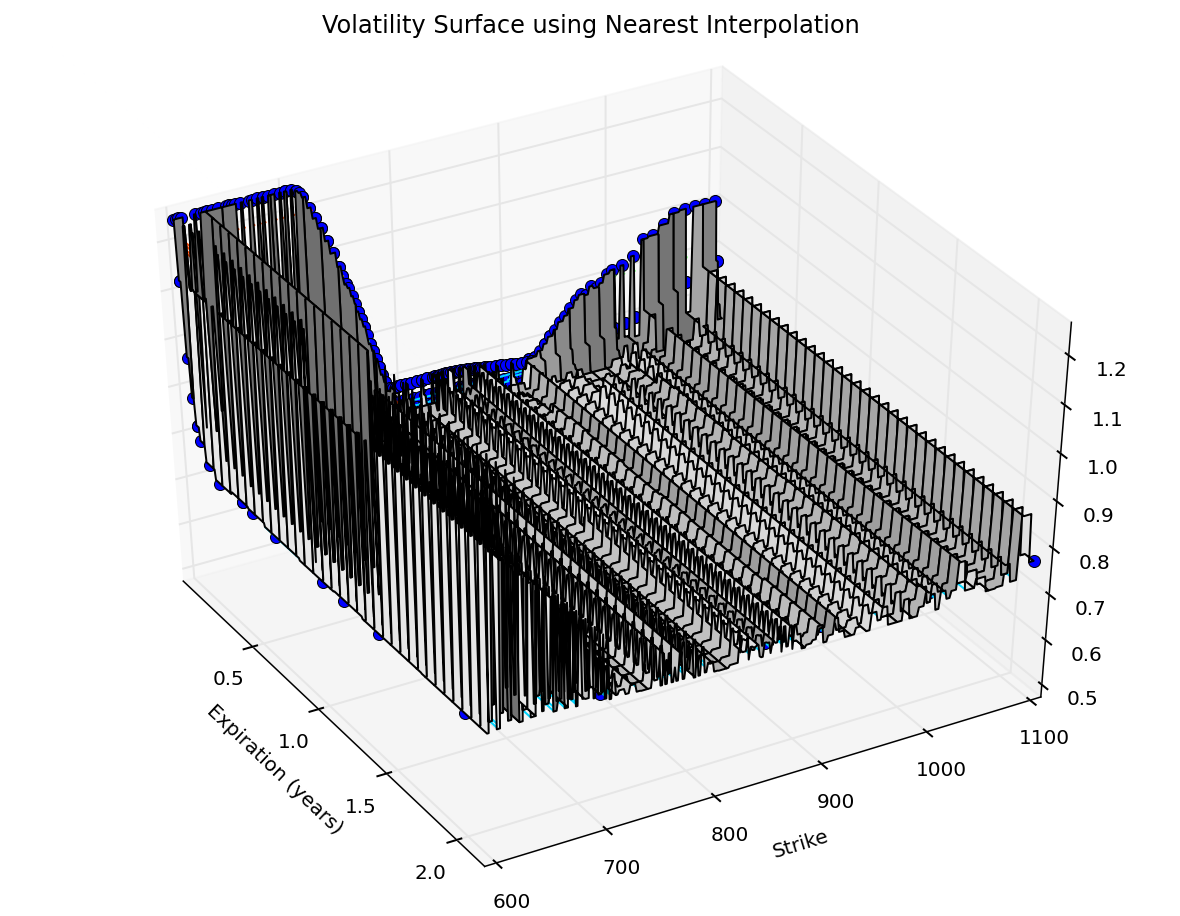

In [11]:
figure = plt.figure(figsize = (8, 6))

XX,YY = np.meshgrid(np.linspace(min(X), max(X), 350), np.linspace(min(Y), max(Y), 350))

ZZ = sci.griddata(np.array([X,Y]).T, np.array(Z),(XX, YY), method = "nearest")
axs = Axes3D(figure, azim = -30, elev = 40)
axs.plot_surface(XX,YY,ZZ, color = "white") 
axs.contour(XX, YY, ZZ)
axs.plot(X, Y, Z, "o")

plt.title("Volatility Surface using Nearest Interpolation", y = 1.08)
plt.xlabel("Expiration (years)")
plt.ylabel("Strike")
plt.show()